In [1]:
#import libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load and read the input file

df_bank=pd.read_csv(f'bank_marketing_updated_v1.csv', skiprows=2)

In [3]:
df_bank

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [4]:
# Step 1: Loop through each column to check for comma-separated values
for col in df_bank.columns:
    # Check if the column contains string data and comma-separated values
    if df_bank[col].dtype == 'object' and df_bank[col].str.contains(',').any():
        # Step 2: Split the column by commas
        split_columns = df_bank[col].str.split(',', expand=True)
        
        # Optional: Rename the new columns
        split_columns.columns = [f"{col}_{i+1}" for i in range(split_columns.shape[1])]
        
        # Step 3: Concatenate the new columns to the original DataFrame
        df_bank = pd.concat([df_bank.drop(col, axis=1), split_columns], axis=1)

# Display the final DataFrame after splitting
print("\nFinal DataFrame after splitting comma-separated values:")
print(df_bank)


Final DataFrame after splitting comma-separated values:
       customerid   age  salary  balance   marital targeted default housing  \
0               1  58.0  100000     2143   married      yes      no     yes   
1               2  44.0   60000       29    single      yes      no     yes   
2               3  33.0  120000        2   married      yes      no     yes   
3               4  47.0   20000     1506   married       no      no     yes   
4               5  33.0       0        1    single       no      no      no   
...           ...   ...     ...      ...       ...      ...     ...     ...   
45206       45207  51.0   60000      825   married      yes      no      no   
45207       45208  71.0   55000     1729  divorced      yes      no      no   
45208       45209  72.0   55000     5715   married      yes      no      no   
45209       45210  57.0   20000      668   married      yes      no      no   
45210       45211  37.0  120000     2971   married      yes      no      n

In [8]:
#rename the columns
df_bank.rename(columns={'jobedu_1': 'jobedu', 'jobedu_2': 'jobedutype','month_1':'month','month_2':'year'}, inplace=True)

In [9]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,45211.0,22606.000000,13051.435847,1.0,11303.5,22606.0,33908.5,45211.0
age,45191.0,40.935651,10.619198,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  duration    45211 non-null  object 
 12  campaign    45211 non-null  int64  
 13  pdays       45211 non-null  int64  
 14  previous    45211 non-null  int64  
 15  poutcome    45211 non-null  object 
 16  response    45181 non-null  object 
 17  jobedu      45211 non-null  object 
 18  jobedutype  45211 non-null  object 
 19  month       45161 non-nul

In [11]:
# Checking column information
# Checking the missing values
missing_values = df_bank.isnull().sum()

# Get the data types
data_types = df_bank.dtypes

# Count duplicates
duplicate_count = df_bank.duplicated().sum()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Types': data_types,
    'Duplicate Count': [duplicate_count] * len(missing_values)
})

summary

,Missing Values,Data Types,Duplicate Count
customerid,0,int64,0
age,20,float64,0
salary,0,int64,0
balance,0,int64,0
marital,0,object,0
targeted,0,object,0
default,0,object,0
housing,0,object,0
loan,0,object,0
contact,0,object,0


In [12]:
# 1. Age: Impute missing values with the median age
median_age=df_bank['age'].median
df_bank['age'].fillna(median_age,inplace=True)

# 2. month: Impute missing values with the mode since categorical data
mode_month=df_bank['month'].mode()[0]
df_bank['month'].fillna(mode_month,inplace=True)

mode_month=df_bank['year'].mode()[0]
df_bank['year'].fillna(mode_month,inplace=True)

# 3. response: Impute missing values with the mode
mode_response=df_bank['response'].mode()[0]
df_bank['response'].fillna(mode_response,inplace=True)

# 4.Function to convert duration to seconds
def convert_to_seconds(duration):
    # Check if the duration contains 'minutes'
    if 'min' in duration:
        # Extract the numeric part and convert to seconds
        return float(duration.split()[0]) * 60  # Convert minutes to seconds
    elif 'sec' in duration:
        return float(duration.split()[0])  # Return seconds as is
    else:
        return None  # Handle unexpected formats

# Apply the conversion function to the duration column
df_bank['duration_seconds'] = df_bank['duration'].apply(convert_to_seconds)
print(df_bank[['customerid','duration', 'duration_seconds']])

df_bank.drop(['duration'], axis=1, inplace=True)

# Final check for missing values and data types
print(df_bank.isnull().sum())

print(df_bank.info())

       customerid              duration  duration_seconds
0               1               261 sec             261.0
1               2               151 sec             151.0
2               3                76 sec              76.0
3               4                92 sec              92.0
4               5               198 sec             198.0
...           ...                   ...               ...
45206       45207  16.2833333333333 min             977.0
45207       45208               7.6 min             456.0
45208       45209  18.7833333333333 min            1127.0
45209       45210  8.46666666666667 min             508.0
45210       45211  6.01666666666667 min             361.0

[45211 rows x 3 columns]
customerid          0
age                 0
salary              0
balance             0
marital             0
targeted            0
default             0
housing             0
loan                0
contact             0
day                 0
campaign            0
pdays         

In [13]:
print(df_bank['age'].isnull().sum())

0


In [14]:

# Step 1: Generate descriptive statistics for numerical columns
numerical_stats = df_bank[['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous','duration_seconds']].describe()
print(df_bank['age'].isnull().sum())
# Step 2: Calculate mean, median, and standard deviation explicitly for numerical columns
# Check data types
print(df_bank.dtypes)

# Ensure numeric columns
numeric_cols = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous','duration_seconds']

print(df_bank['age'].isnull().sum())
print(df_bank['age'].unique())

# Check for non-numeric entries
non_numeric_ages = df_bank[~df_bank['age'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_ages)
# Remove rows with non-numeric values in 'age'
df_bank = df_bank[pd.to_numeric(df_bank['age'], errors='coerce').notnull()]

# Convert columns to numeric if necessary
for col in numeric_cols:
    #df_bank[col] = pd.to_numeric(df_bank[col]) 
    df_bank[col] = pd.to_numeric(df_bank[col], errors='coerce') 
# Converts to numeric and sets non-convertible values to NaN

# Now calculate mean values
mean_values = df_bank[numeric_cols].mean()

print(mean_values)



0
customerid            int64
age                  object
salary                int64
balance               int64
marital              object
targeted             object
default              object
housing              object
loan                 object
contact              object
day                   int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
response             object
jobedu               object
jobedutype           object
month                object
year                 object
duration_seconds    float64
dtype: object
0
[58.0 44.0 33.0 47.0 35.0 28.0 42.0 43.0 41.0 29.0 53.0 57.0 51.0 45.0
 60.0 56.0 32.0 25.0 40.0 39.0 52.0 46.0 36.0 49.0 59.0 37.0 50.0 54.0
 55.0 48.0 24.0 38.0 31.0 30.0 27.0 34.0 23.0 26.0
 <bound method NDFrame._add_numeric_operations.<locals>.median of 0        58.0
 1        44.0
 2        33.0
 3        47.0
 4        33.0
          ...
 45206    51.0
 45207    71.0
 45208    72.0
 4

In [15]:
median_values = df_bank[['age', 'salary', 'balance', 'day', 'duration_seconds', 'campaign', 'pdays', 'previous']].median()
std_values = df_bank[['age', 'salary', 'balance', 'day', 'duration_seconds', 'campaign', 'pdays', 'previous']].std()

# Step 3: Create a summary DataFrame for mean, median, and std
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

# Display summary statistics
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                           Mean   Median  Standard Deviation
age                  40.935651     39.0           10.619198
balance            1362.432520    448.0         3045.120417
campaign              2.763847      2.0            3.098407
day                  15.806289     16.0            8.322311
duration_seconds    258.181784    180.0          257.564354
pdays                40.181253     -1.0          100.074099
previous              0.579983      0.0            2.303017
salary            57005.974641  60000.0        32084.253154


In [16]:
# Step 4: Check unique values for categorical columns
categorical_columns = ['customerid', 'marital', 'jobedu','jobedutype','month','year', 'targeted', 'default', 'housing', 'loan', 'contact', 'poutcome', 'response']

for col in categorical_columns:
    print(f"\nUnique values in {col}:\n", df_bank[col].value_counts())


Unique values in customerid:
 customerid
1        1
30202    1
30138    1
30139    1
30140    1
        ..
15077    1
15078    1
15079    1
15080    1
45211    1
Name: count, Length: 45191, dtype: int64

Unique values in marital:
 marital
married     27204
single      12786
divorced     5201
Name: count, dtype: int64

Unique values in jobedu:
 jobedu
blue-collar      9727
management       9455
technician       7594
admin.           5170
services         4152
retired          2263
self-employed    1578
entrepreneur     1485
unemployed       1302
housemaid        1239
student           938
unknown           288
Name: count, dtype: int64

Unique values in jobedutype:
 jobedutype
secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: count, dtype: int64

Unique values in month:
 month
may    13790
jul     6885
aug     6235
jun     5333
nov     3967
apr     2930
feb     2646
jan     1402
oct      737
sep      576
mar      476
dec      214
Name: count, dtype: int6

Response Counts:
 response
no     39906
yes     5285
Name: count, dtype: int64


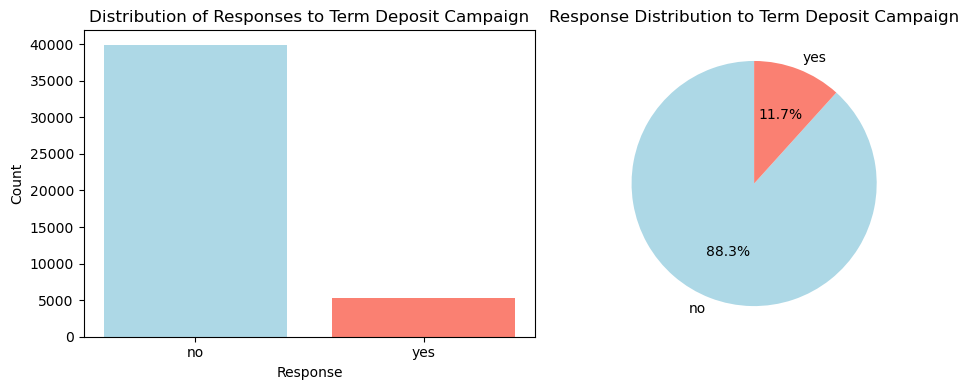

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Check unique values and their counts in the target variable
response_counts = df_bank['response'].value_counts()
print("Response Counts:\n", response_counts)


# Step 2: Visualize the distribution using a bar plot
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

axs[0].bar(response_counts.index, response_counts.values, color=['lightblue', 'salmon'])
axs[0].set_title('Distribution of Responses to Term Deposit Campaign')
axs[0].set_xlabel('Response')
axs[0].set_ylabel('Count')

  
#Visualize the distribution using a pie chart
axs[1].pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
axs[1].set_title('Response Distribution to Term Deposit Campaign')
axs[1].set_ylabel('')


# Show the plots
plt.tight_layout()
plt.show()

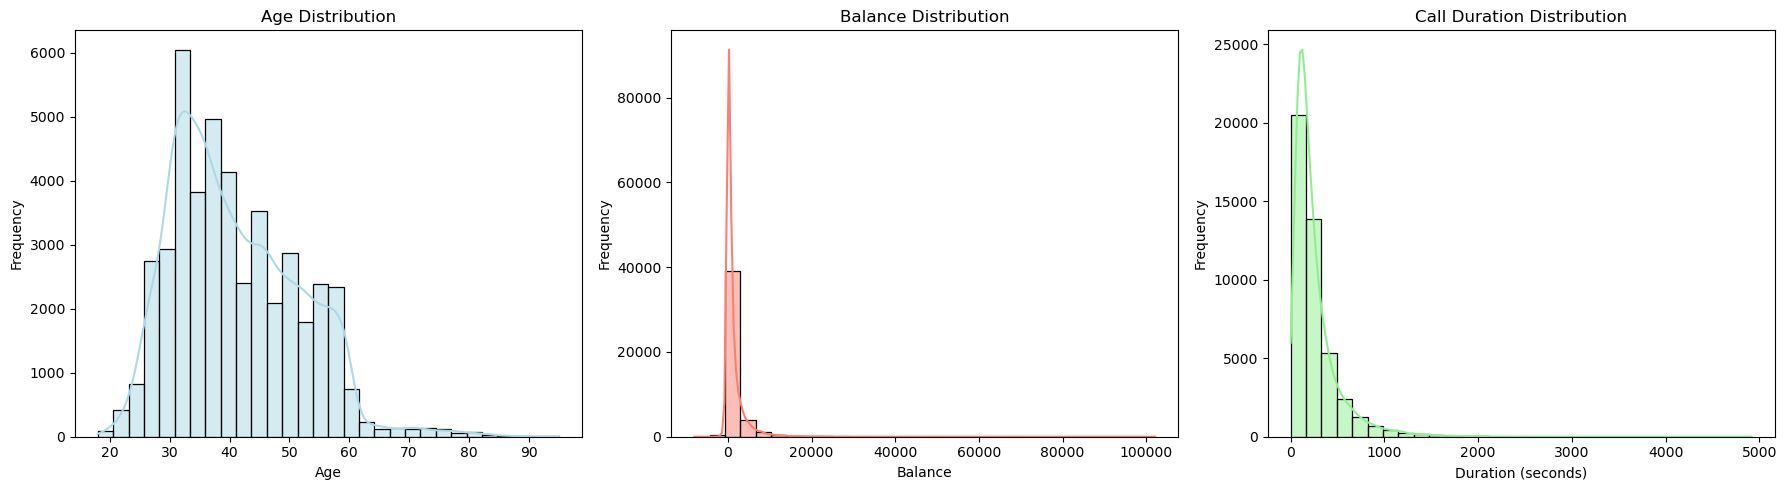

In [21]:
#3. Univariate Analysis
#a. Examine the distribution of individual key features, such as age, balance, and call duration.
#b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

# 1. Descriptive Statistics
age_stats = df_bank['age'].describe()
balance_stats = df_bank['balance'].describe()
duration_stats = df_bank['duration_seconds'].describe()

# 2. Visualizations

# Set up the figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.histplot(df_bank['age'], bins=30, kde=True, ax=axs[0], color='lightblue')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Balance Distribution
sns.histplot(df_bank['balance'], bins=30, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Balance Distribution')
axs[1].set_xlabel('Balance')
axs[1].set_ylabel('Frequency')

# Duration Distribution
sns.histplot(df_bank['duration_seconds'], bins=30, kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Call Duration Distribution')
axs[2].set_xlabel('Duration (seconds)')
axs[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [38]:
# Here are the results of the univariate analysis and target variable distribution:
# 1.	Distribution of Campaign Responses:
# The majority of responses are "no", meaning most customers did not subscribe to the term deposit campaign. 
#There is a significant imbalance between "yes" and "no" responses.
# 2.	Age Distribution:
# The age distribution shows a slight right skew, with most customers being between 30 and 50 years old.
#There are a few younger and older customers in the dataset.
# 3.	Balance Distribution:
# The balance distribution is highly skewed to the right, with most customers having relatively low balances, while a few have significantly higher balances.
#There are also some negative balances.
# 4.	Call Duration Distribution:
# The call duration data is also right-skewed, with most calls lasting under 400 seconds (~6.6 minutes).
#A few calls lasted significantly longer.


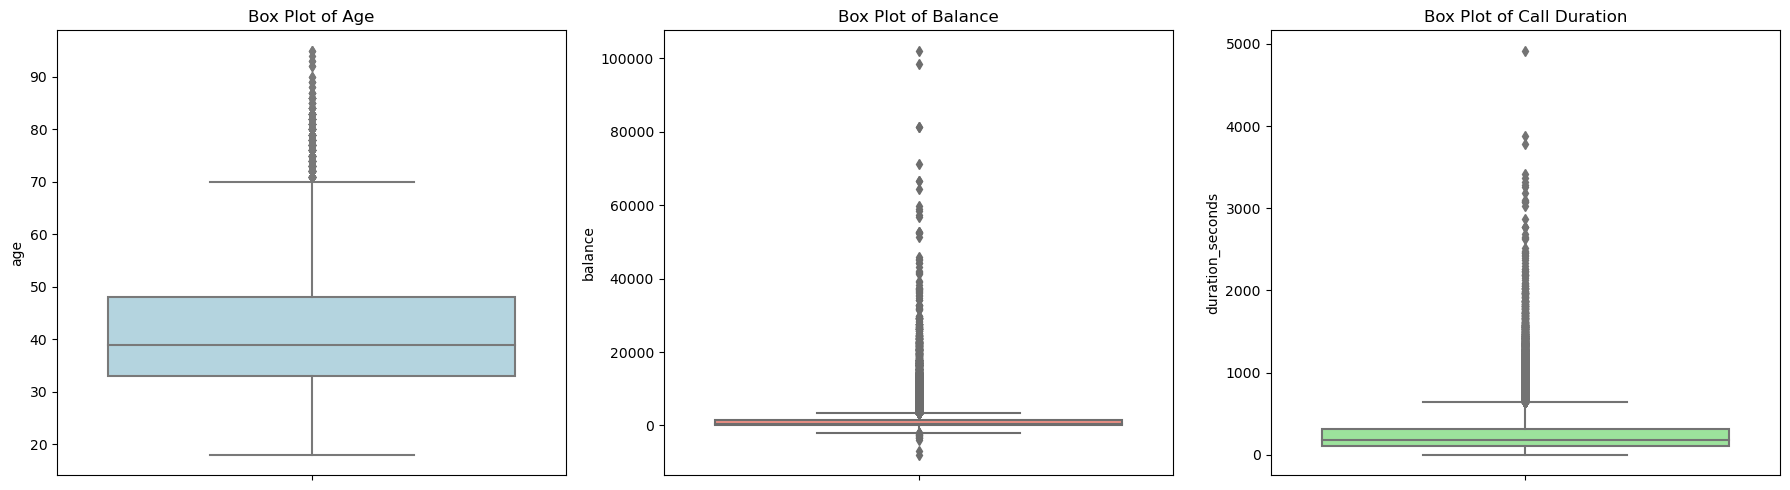

In [22]:
plt.figure(figsize=(18, 5))

# Box Plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df_bank['age'], color='lightblue')
plt.title('Box Plot of Age')

# Box Plot for Balance
plt.subplot(1, 3, 2)
sns.boxplot(y=df_bank['balance'], color='salmon')
plt.title('Box Plot of Balance')

# Box Plot for Duration
plt.subplot(1, 3, 3)
sns.boxplot(y=df_bank['duration_seconds'], color='lightgreen')
plt.title('Box Plot of Call Duration')

plt.tight_layout()
plt.show()

In [39]:
# Boxplots:
# Age Boxplot: The majority of ages fall within a reasonable range, with a few outliers at the older end.
# Balance Boxplot: There are significant outliers, with some extremely high positive and negative balances.
# Call Duration Boxplot: There are a few extreme outliers, with some calls lasting much longer than the average


In [528]:
# 4. Bivariate Analysis
# a. Evaluate the relationship between independent variables and the target variable.
# b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.

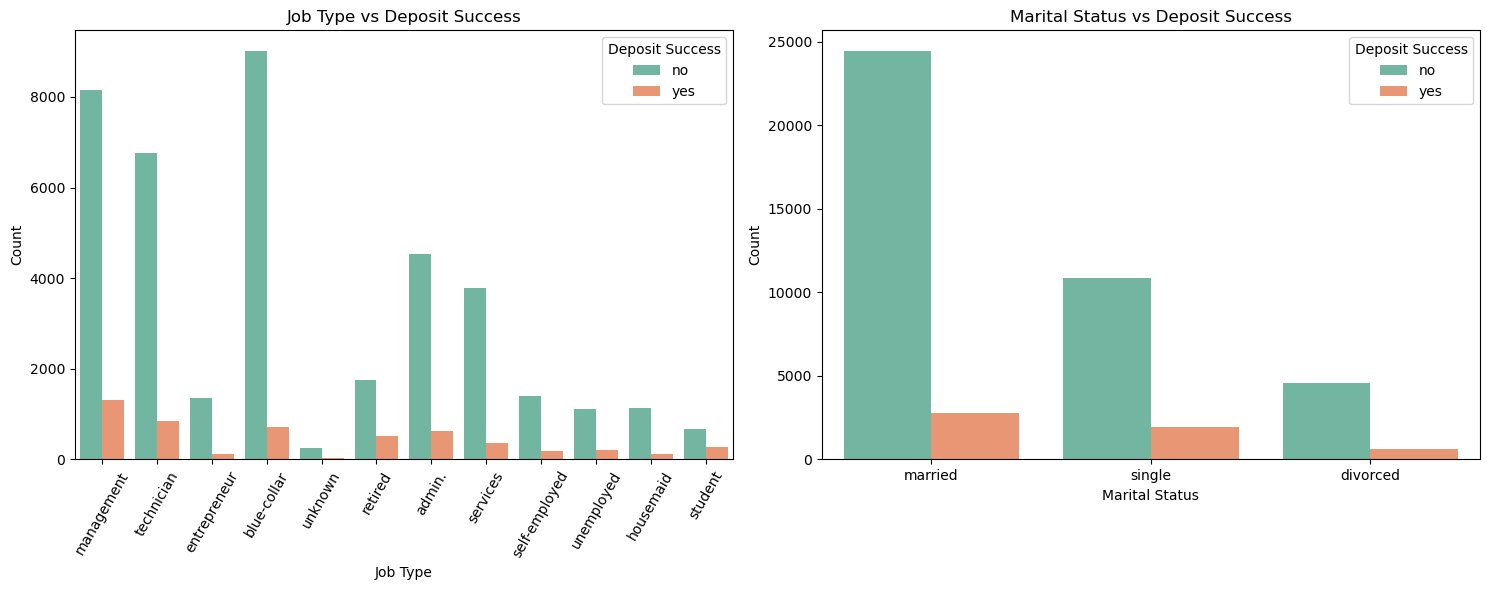

In [23]:
#1. Bar Charts for Categorical Variables

# Set up the figure for subplots
plt.figure(figsize=(15, 6))

# Job vs Deposit Success
plt.subplot(1, 2, 1)
sns.countplot(data=df_bank, x='jobedu', hue='response', palette='Set2')
plt.title('Job Type vs Deposit Success')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Deposit Success')

# Marital Status vs Deposit Success
plt.subplot(1, 2, 2)
sns.countplot(data=df_bank, x='marital', hue='response', palette='Set2')
plt.title('Marital Status vs Deposit Success')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit Success')

plt.tight_layout()
plt.show()

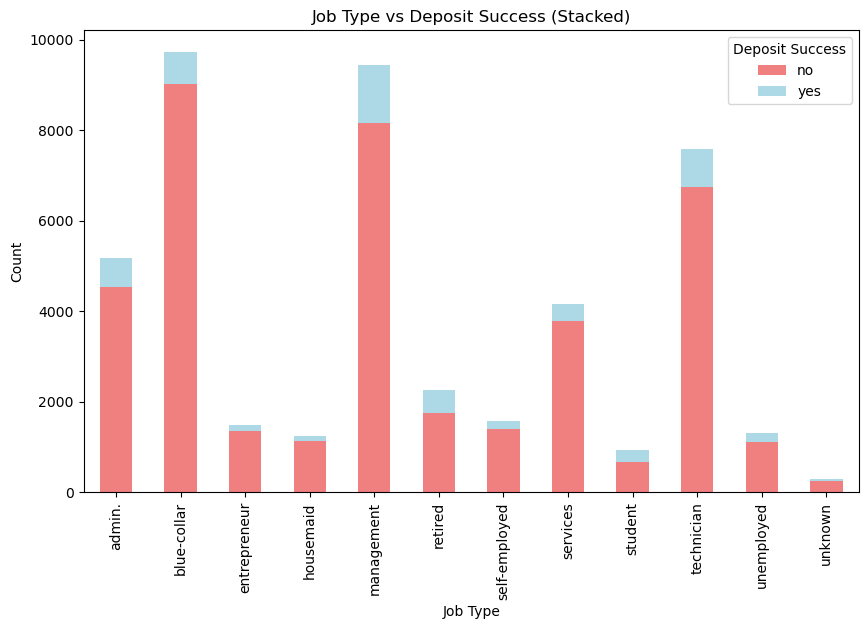

In [24]:
#B. Analyze Associations Using Stacked Bar Charts and Heat Maps

# Create a contingency table
job_deposit = pd.crosstab(df_bank['jobedu'], df_bank['response'])

# Plot stacked bar chart
job_deposit.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], figsize=(10, 6))
plt.title('Job Type vs Deposit Success (Stacked)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Deposit Success')
plt.show()

In [531]:
#2. Heat Maps for Correlation

In [532]:
# Encode the target variable
#df_bank['deposit_success_numeric'] = df_bank['response'].map({'yes': 1, 'no': 0})

# # Function to convert yes/no to 1/0
# def convert_yes_no(value):
#     if value == 'yes':
#         return 1
#     elif value == 'no':
#         return 0
#     return value  # Keep other values unchanged

# # Loop through each column and apply the conversion if it contains yes/no values
# for column in df_bank.columns:
#     if df_bank[column].dtype == 'object' and df_bank[column].isin(['yes', 'no']).any():
#         df_bank[column] = df_bank[column].apply(convert_yes_no)
        


In [533]:
#df_bank.replace('unknown', pd.NA, inplace=True)   

In [534]:
df_bank

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,jobedu_1,jobedu_2,month_1,month_2,duration_seconds
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,management,tertiary,may,2017,261.0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,technician,secondary,may,2017,151.0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,1,-1,0,unknown,no,entrepreneur,secondary,may,2017,76.0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,1,-1,0,unknown,no,blue-collar,unknown,may,2017,92.0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,1,-1,0,unknown,no,unknown,unknown,may,2017,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,3,-1,0,unknown,yes,technician,tertiary,nov,2017,977.0
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,2,-1,0,unknown,yes,retired,primary,nov,2017,456.0
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,5,184,3,success,yes,retired,secondary,nov,2017,1127.0
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,4,-1,0,unknown,no,blue-collar,secondary,nov,2017,508.0


In [535]:
# One-hot encode categorical variables (job, education, marital)
#df_bank_encoded = pd.get_dummies(df_bank, columns=['jobedu_1', 'marital'], drop_first=True)

In [536]:
# Calculate the correlation matrix
#correlation_matrix = df_bank_encoded.corr()

In [537]:
# Selecting only numeric columns
#numeric_df = df_bank_encoded.select_dtypes(include=['number'])

# # Calculating the correlation matrix
# correlation_matrix = df_bank_encoded.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",square=True, cbar_kws={"shrink": .8})
# plt.title('Correlation Heatmap')
# plt.show()

In [538]:
# 5. Categorical Variables Analysis
# a. Investigate the distribution of categorical variables such as job type, education, and marital status.
# b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

In [539]:
# # 6. Temporal Analysis
# a. Investigate temporal patterns in the success of the campaign over time.
# b. Analyze if specific months or days exhibit superior campaign performance.

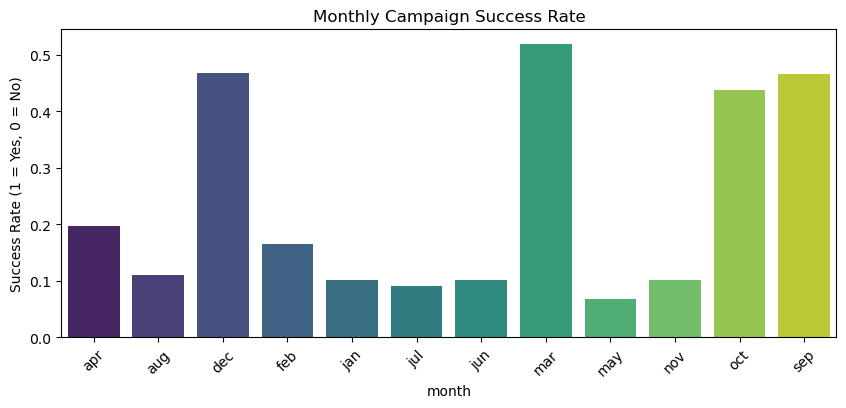

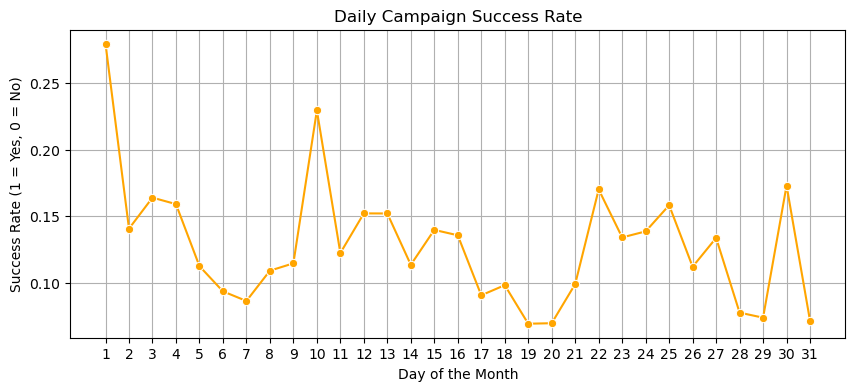

In [27]:
# Convert deposit_success to numeric (0/1)
df_bank['deposit_success_numeric'] = df_bank['response'].map({'yes': 1, 'no': 0})

# a. Temporal Analysis: Group by Month
#df_bank['month'] = df_bank['date'].dt.to_period('M')  # Extracting month
monthly_performance = df_bank.groupby('month')['deposit_success_numeric'].mean().reset_index()

# b. Plot Monthly Performance
plt.figure(figsize=(10, 4))
sns.barplot(x='month', y='deposit_success_numeric', data=monthly_performance, palette='viridis')
plt.title('Monthly Campaign Success Rate')
plt.xlabel('month')
plt.ylabel('Success Rate (1 = Yes, 0 = No)')
plt.xticks(rotation=45)
plt.show()

# Optional: Investigate Day of the Month (if you have daily data)
#df_bank['day'] = df_bank['date'].dt.day  # Extracting day
daily_performance = df_bank.groupby('day')['deposit_success_numeric'].mean().reset_index()

# Plot Daily Performance (only for demonstration)
plt.figure(figsize=(10, 4))
sns.lineplot(x='day', y='deposit_success_numeric', data=daily_performance, marker='o', color='orange')
plt.title('Daily Campaign Success Rate')
plt.xlabel('Day of the Month')
plt.ylabel('Success Rate (1 = Yes, 0 = No)')
plt.xticks(range(1, 32))
plt.grid()
plt.show()

The month of March has more that 50% sucess rate while May being the lowest

1st of month has more that 25% chance of sucess rate

In [541]:
# 7. Feature Engineering
# a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
# b. Apply encoding techniques to transform categorical variables if necessary.

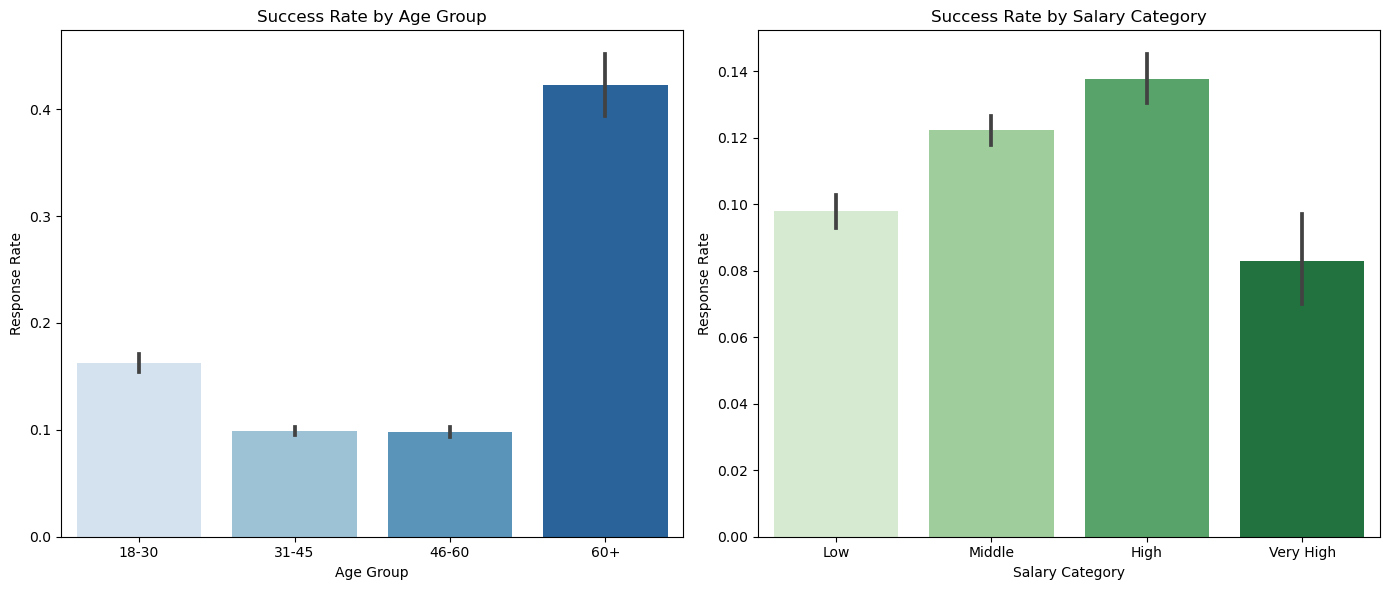

In [28]:
# Encoding the 'response' column (Yes=1, No=0)
df_bank['response'] = df_bank['response'].map({'yes': 1, 'no': 0})

# Step 1: Create a temporary DataFrame
df_temp = df_bank.copy()

# Creating age groups
df_temp['age_group'] = pd.cut(df_bank['age'], 
                                 bins=[18, 30, 45, 60, 95], 
                                 labels=['18-30', '31-45', '46-60', '60+'], 
                                 include_lowest=True)

# Creating salary categories
df_temp['salary_category'] = pd.cut(df_bank['salary'], 
                                       bins=[0, 30000, 70000, 100000, 120000], 
                                       labels=['Low', 'Middle', 'High', 'Very High'], 
                                       include_lowest=True)

# Setting up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Age Group vs. Response
sns.barplot(x='age_group', y='response', data=df_temp, palette='Blues', ax=axes[0])
axes[0].set_title('Success Rate by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Response Rate')

# Plot 2: Salary Category vs. Response
sns.barplot(x='salary_category', y='response', data=df_temp, palette='Greens', ax=axes[1])
axes[1].set_title('Success Rate by Salary Category')
axes[1].set_xlabel('Salary Category')
axes[1].set_ylabel('Response Rate')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [41]:
# •  Age vs. Campaign Response (Countplot):
# •	Interpretation: This visualization can help reveal whether certain age groups are more responsive to campaigns.
#For instance, a lower median age among respondents with a "yes" response might suggest younger customers are more receptive,
#while a wider spread or outliers could indicate variance in how age affects response.
# •	Inference: If younger age groups (e.g., 25–40 years) show higher positive responses, the campaign might benefit from targeting this demographic more intensely.


In [42]:
# •  Marital Status vs. Campaign Response (Countplot):
# •	Interpretation: This visualization helps explore the impact of marital status on campaign response. 
#For instance, if single individuals have a higher response rate, then specific content might resonate better with them.
# •	Inference: Observing trends across marital statuses can inform personalized messaging, emphasizing either financial independence or family-oriented offers depending on the dominant respondent group.


In [ ]:
# •  Education  vs. Campaign Response (stacked bar plot):
# •	Interpretation: This plot shows which educational backgrounds have higher campaign response rates.
#Suppose primary-educated individuals respond more positively; it might suggest they find the campaign’s offers more relevant to their financial or lifestyle needs.
# •	Inference: This insight could prompt a reevaluation of how campaigns are communicated, potentially emphasizing simplicity or specific financial benefits if lower-educated groups 

In [ ]:
# •  Balance vs. Campaign Response (Boxplot):
# •	Interpretation: A balance boxplot can highlight any significant differences in account balances among respondents.
#For instance, if respondents with higher balances show more positive responses, it might indicate a correlation between financial stability and interest in the campaign.
# •	Inference: Campaigns might need to consider the financial profile of respondents.
#If higher-balance individuals respond more, campaigns could emphasize investment or savings benefits, while for lower-balance respondents, highlighting immediate or low-cost advantages might be more effective.


In [ ]:
# •  Call Duration vs. Campaign Response (Boxplot):
# •	Interpretation: This plot explores if the duration of customer calls relates to campaign success.
#Longer call durations often indicate higher engagement and could correlate with positive responses.
# •	Inference: If "yes" responses correlate with longer call durations, it suggests agents should focus on detailed explanations during calls.
#Short-duration calls with lower response rates might prompt a strategy shift to improve interaction quality.


In [30]:
#Step 2: One-Hot Encoding for Categorical Variables

# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df_bank, columns=['marital', 'jobedu', 'jobedutype', 'housing', 'loan','targeted','default','contact','poutcome'], drop_first=True)

# Create a mapping dictionary for months
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Apply mapping to the month column
df_encoded['month'] = df_encoded['month'].map(month_mapping)

# Checking the first few rows of the dataset after encoding
column_names = df_encoded.columns
print(column_names)

Index(['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays',
       'previous', 'response', 'month', 'year', 'duration_seconds',
       'deposit_success_numeric', 'marital_married', 'marital_single',
       'jobedu_blue-collar', 'jobedu_entrepreneur', 'jobedu_housemaid',
       'jobedu_management', 'jobedu_retired', 'jobedu_self-employed',
       'jobedu_services', 'jobedu_student', 'jobedu_technician',
       'jobedu_unemployed', 'jobedu_unknown', 'jobedutype_secondary',
       'jobedutype_tertiary', 'jobedutype_unknown', 'housing_yes', 'loan_yes',
       'targeted_yes', 'default_yes', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [31]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

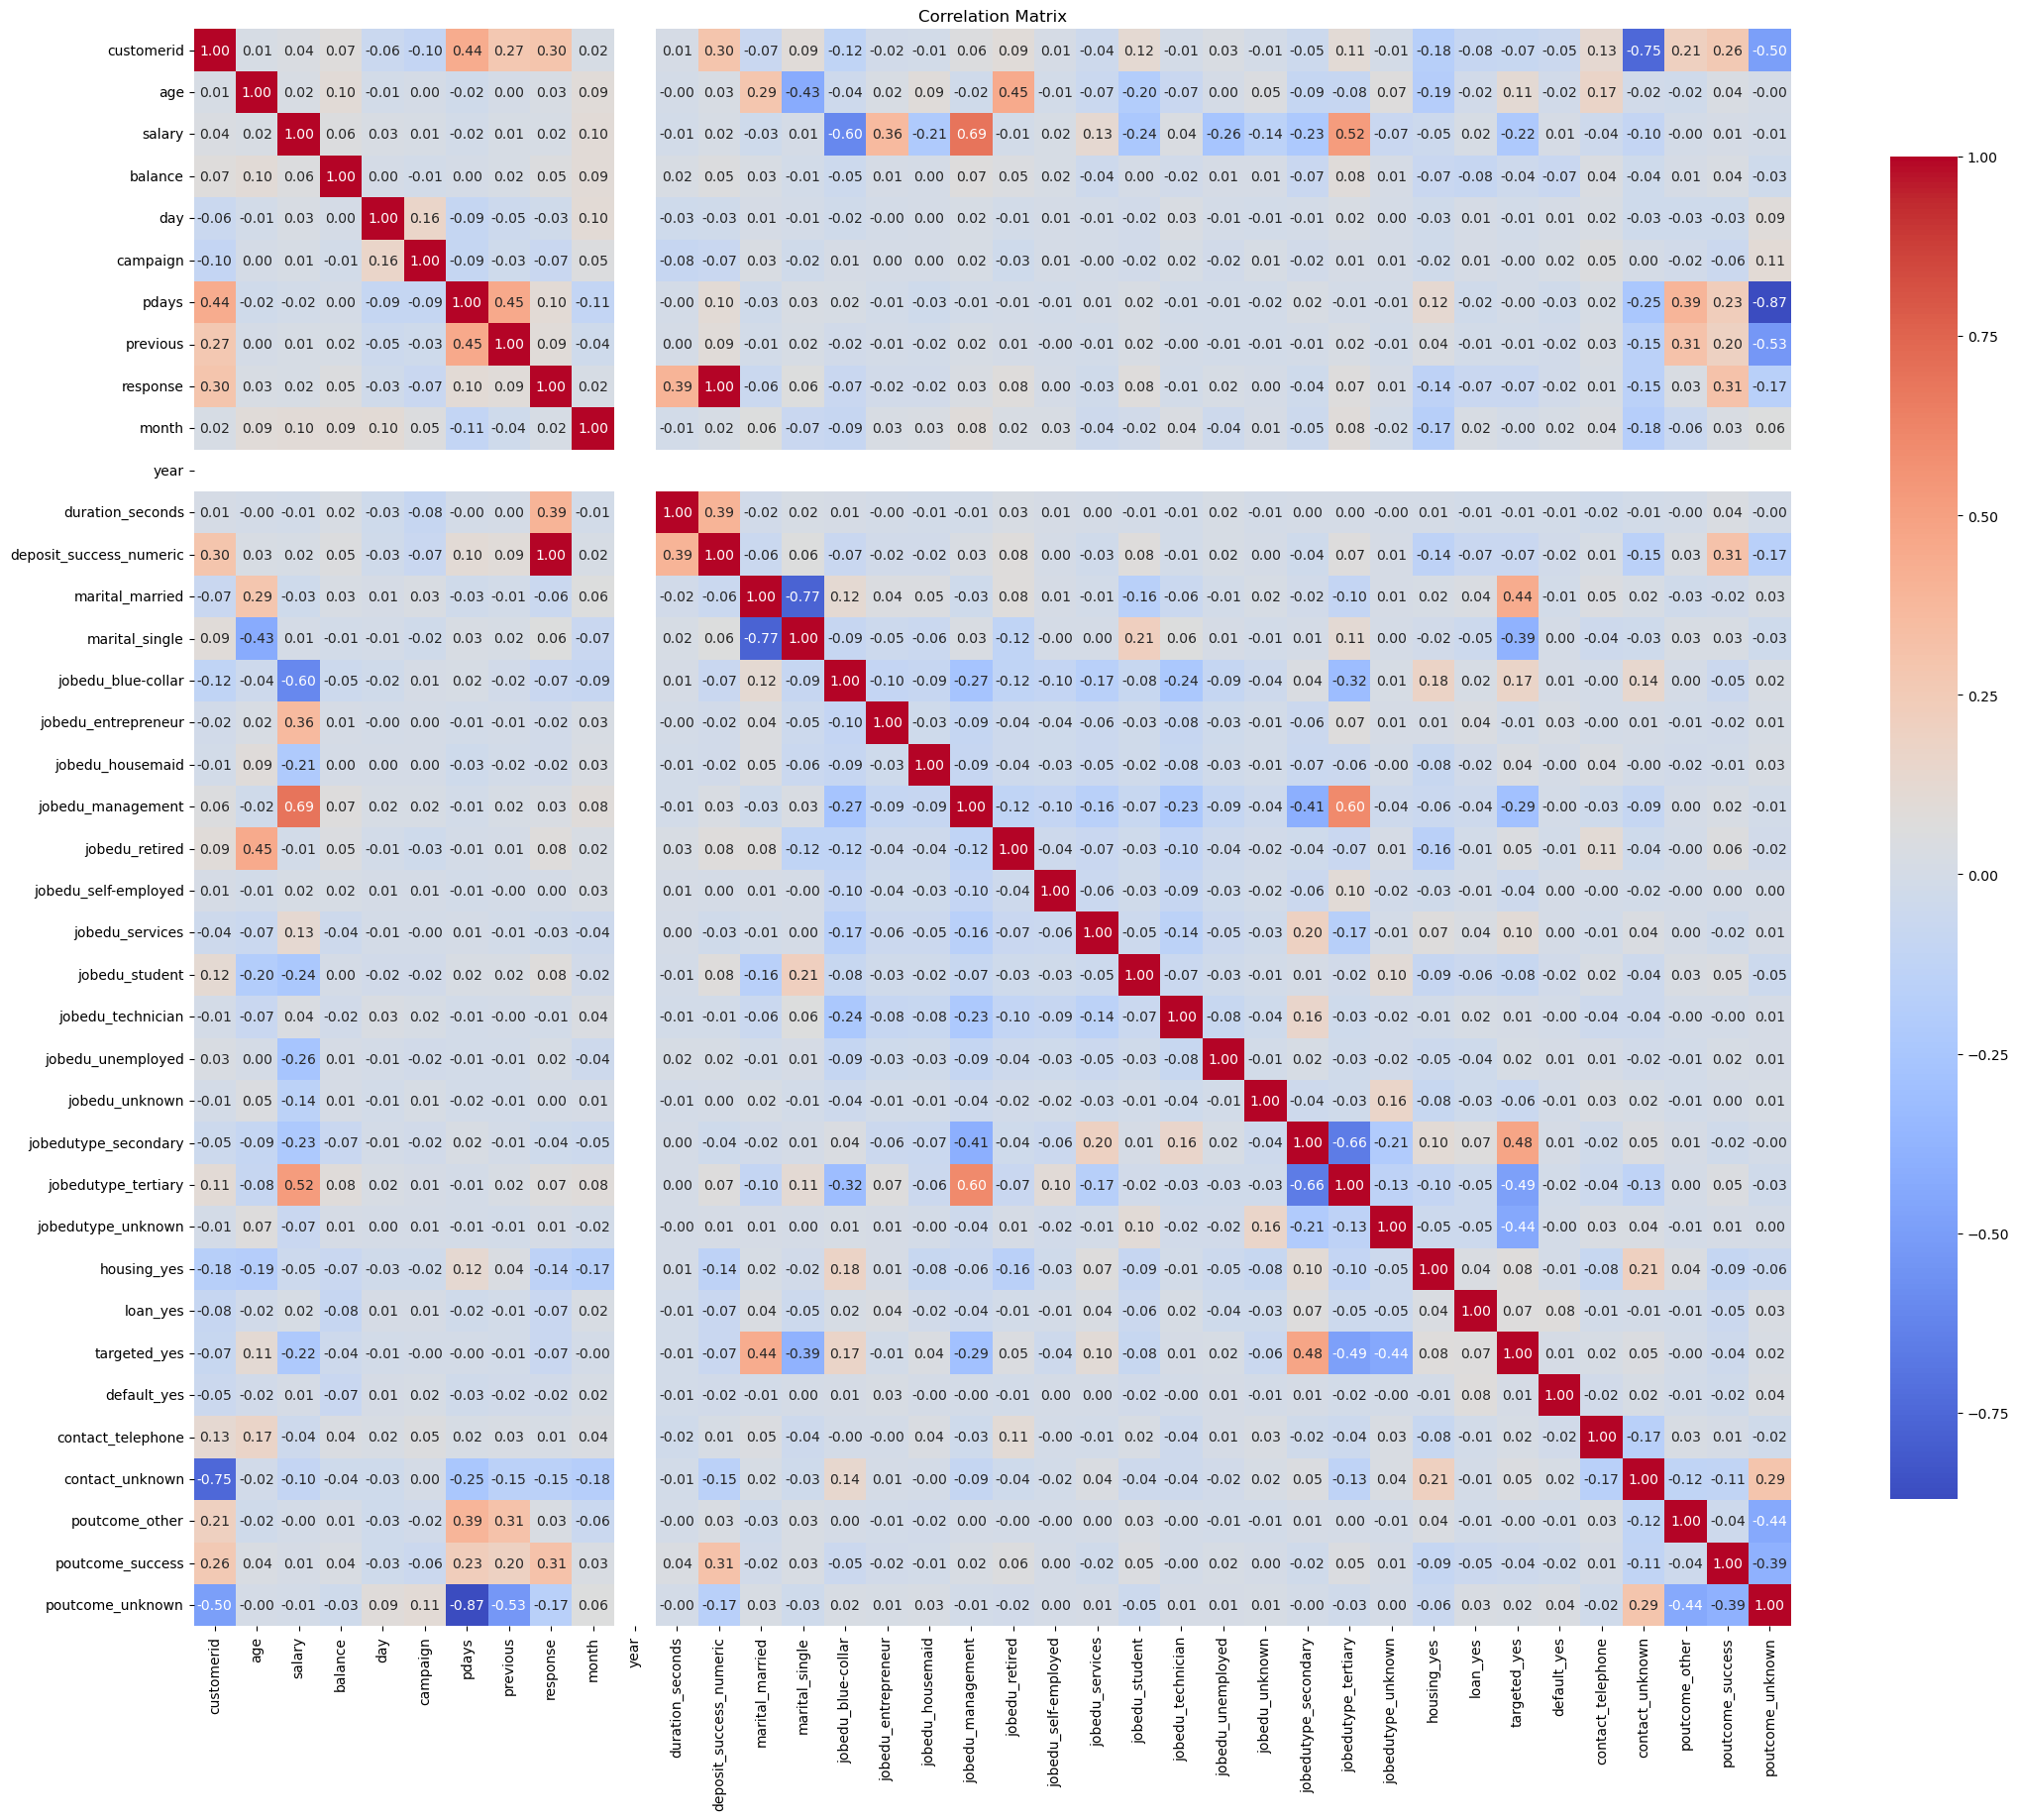

In [32]:
plt.figure(figsize=(26, 22))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [33]:
# 9. Outlier Detection and Handling
# a. Identify and rectify outliers that could impact the analysis and predictions.

from scipy import stats
df_bank



,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,pdays,previous,poutcome,response,jobedu,jobedutype,month,year,duration_seconds,deposit_success_numeric
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,...,-1,0,unknown,0,management,tertiary,may,2017,261.0,0
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,...,-1,0,unknown,0,technician,secondary,may,2017,151.0,0
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,...,-1,0,unknown,0,entrepreneur,secondary,may,2017,76.0,0
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,...,-1,0,unknown,0,blue-collar,unknown,may,2017,92.0,0
4,5,33.0,0,1,single,no,no,no,no,unknown,...,-1,0,unknown,0,unknown,unknown,may,2017,198.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,...,-1,0,unknown,1,technician,tertiary,nov,2017,977.0,1
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,...,-1,0,unknown,1,retired,primary,nov,2017,456.0,1
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,...,184,3,success,1,retired,secondary,nov,2017,1127.0,1
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,...,-1,0,unknown,0,blue-collar,secondary,nov,2017,508.0,0


In [34]:
print(df_bank['age'].isnull().sum())

0


In [36]:
import scipy.stats as stats
# Ensure the age column is numeric and check for any non-numeric values
df_bank['age'] = pd.to_numeric(df_bank['age'], errors='coerce')
df_bank['deposit_success_numeric'] = pd.to_numeric(df_bank['deposit_success_numeric'], errors='coerce')

# Display the DataFrame info to check for NaNs
print("DataFrame Info Before Z-Score Calculation:")
print(df_bank.info())

# Step 1: Calculate Z-scores for the specified numeric columns
z_scores = stats.zscore(df_bank[['age', 'deposit_success_numeric']])

# Check the shape of z_scores
print("\nZ-scores shape:", z_scores.shape)
print("Z-scores contents:\n", z_scores)

# Step 2: Assign Z-scores back to the DataFrame
try:
    # Check if z_scores is a 2D array
    if len(z_scores.shape) == 2 and z_scores.shape[1] == 2:
        df_bank['z_score_age'] = z_scores[:, 0]  # Z-scores for age
        df_bank['z_score_deposit'] = z_scores[:, 1]  # Z-scores for deposit_success_numeric
        
        # Identify outliers based on Z-scores
        outliers = df_bank[(df_bank['z_score_age'].abs() > 3) | (df_bank['z_score_deposit'].abs() > 3)]

# Print the outliers
        print("Outliers based on Z-scores:")
        print(outliers)
    else:
        print("Z-scores array does not have the expected shape.")
except Exception as e:
    print("Error during assignment:", e)

# Print the updated DataFrame
print("\nDataFrame with Z-scores:")
print(df_bank)


DataFrame Info Before Z-Score Calculation:
<class 'pandas.core.frame.DataFrame'>
Index: 45191 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerid               45191 non-null  int64  
 1   age                      45191 non-null  float64
 2   salary                   45191 non-null  int64  
 3   balance                  45191 non-null  int64  
 4   marital                  45191 non-null  object 
 5   targeted                 45191 non-null  object 
 6   default                  45191 non-null  object 
 7   housing                  45191 non-null  object 
 8   loan                     45191 non-null  object 
 9   contact                  45191 non-null  object 
 10  day                      45191 non-null  int64  
 11  campaign                 45191 non-null  int64  
 12  pdays                    45191 non-null  int64  
 13  previous                 45191 non-nul